## APCs plotting

Small demonstration of how to download files from the web, load them into a pandas dataframe and then filter and plot them. 


## Introduction

We will now look at an extra package (a so called Python library) called Pandas. This library brings extra functions that we can import into our Jupyter notebook and specifically brings commands useful for data analysis. 

With Python, once we have the Core Language e.g. the Python Basics we just looked at. Then there are various libraries that bring further functionalities. There are also Third Party Libraries, as libraries that users have created. A very popular one is for example Pandas.

Pandas was written to work with tabular data. 


[Open Getting started page of Pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)

Here we see the documentation of Pandas. Every good library should have good documentation. 

Here we see for example:  

**What kind of data does pandas handle?**.
So what you always have with pandas is a so called dataframe. The dataframe actually comes from the R programming language and is nothing more than a table.
This table consists of different columns called **Columns** and different rows called **Rows**. Most of the time the first column is the so called **Index column**.

Under the tab **How do I read and write tabular data?** we can see what data can be read into pandas. We have different file formats, e.g. CSV (comma separated value), TSV (tab separated value), xlsx (Excel files), etc. can be read by Pandas as long as they are in tabular form and creates a Pandas dataframe from them.

We can then edit this dataframe i.e:
- filter, generate calculations from the various columns, graph the data, etc.

We can then save the modified dataframe in a desired format (CSV, TSV, Excel, HTML, etc.). For example, we can also import a CSV file and save it as a JSON file.

This is what we will work with in Pandas.
First, let's look at the data we will be working with.

To do this, we'll go to GitHub.
- https://github.com/OpenAPC/openapc-de 

We look at the repository (more later on git lesson) "OpenAPC de". APC stands for "Article Process Charges. So what do you spend to publish articles. OpenAPC is an organization that aims to openly collect data showing how much German-speaking institutions pay for APCs.

Here there is a "data" folder. In this folder we find a folder called "FU Berlin" which we look at. Here we have collected the information for the respective year, the whole thing as CSV files. As an example we look at the year 2015. 

As you can see, we have a table here, with the different columns (institution, period, price in euros, DOI, hybrid journal, publisher, journal_full_title, etc.). What we want to look at today is how much the FU Berlin paid on average for the APCs and how the prices are distributed.

The way we see the table now, it is already nicely rendered in html by GitHub. If we click on Raw, we see the "raw" state of the data and then we also see the comma separator and that it is Plain Text. What we also see is that the first row is our column names (institution, period, etc.). The second line is then an entry.

Now let's look at the data in the Jupyter notebook with Pandas:


In [1]:
import urllib.request
import pandas as pd

In [2]:
# Set the source url
url = "https://raw.githubusercontent.com/OpenAPC/openapc-de/master/data/fuberlin/APC_FU_Berlin_2015.csv"
apc_file = "openapc.csv"

In [3]:
# Download the data and store them locally. 
urllib.request.urlretrieve(url, apc_file)

('openapc.csv', <http.client.HTTPMessage at 0x7f4179c75df0>)

In [4]:
# without pandas
for line in open(apc_file):
    print(line.strip())
    split_line = line.split(",")
    print(split_line[2])
    print("-----")

"institution","period","euro","doi","is_hybrid","publisher","journal_full_title","issn","issn_print","issn_electronic","license_ref","indexed_in_crossref","pmid","pmcid","ut","url","doaj"
"euro"
-----
"FU Berlin",2015,2000,"10.1038/npjqi.2015.10",FALSE,"Springer Nature","npj Quantum Information","2056-6387",NA,"2056-6387",NA,TRUE,NA,NA,NA,NA,TRUE
2000
-----
"FU Berlin",2015,1503.12,"10.1103/PhysRevX.5.041008",FALSE,"American Physical Society (APS)","Physical Review X","2160-3308",NA,"2160-3308","http://creativecommons.org/licenses/by/3.0/",TRUE,NA,NA,NA,NA,TRUE
1503.12
-----
"FU Berlin",2015,2000,"10.1038/ncomms9498",FALSE,"Springer Nature","Nature Communications","2041-1723",NA,"2041-1723",NA,TRUE,"26577800","PMC4673657",NA,NA,TRUE
2000
-----
"FU Berlin",2015,2000,"10.1371/journal.ppat.1005246",FALSE,"Public Library of Science (PLoS)","PLOS Pathogens","1553-7374",NA,"1553-7374","http://creativecommons.org/licenses/by/4.0/",TRUE,"26544881","PMC4636265",NA,NA,TRUE
2000
-----
"FU Berlin"

In [5]:
# Read the csv file into a pandas DataFrame
apcs = pd.read_csv(apc_file)

In [6]:
# Display the content of the DataFrame
# The Jupyter Notebook reconized that the object is DataFrame
# and translates this into a nicely formated table.
apcs

,institution,period,euro,doi,is_hybrid,publisher,journal_full_title,issn,issn_print,issn_electronic,license_ref,indexed_in_crossref,pmid,pmcid,ut,url,doaj
0,FU Berlin,2015,2000.00,10.1038/npjqi.2015.10,False,Springer Nature,npj Quantum Information,2056-6387,NaN,2056-6387,NaN,True,NaN,NaN,NaN,NaN,True
1,FU Berlin,2015,1503.12,10.1103/PhysRevX.5.041008,False,American Physical Society (APS),Physical Review X,2160-3308,NaN,2160-3308,http://creativecommons.org/licenses/by/3.0/,True,NaN,NaN,NaN,NaN,True
2,FU Berlin,2015,2000.00,10.1038/ncomms9498,False,Springer Nature,Nature Communications,2041-1723,NaN,2041-1723,NaN,True,26577800.0,PMC4673657,NaN,NaN,True
3,FU Berlin,2015,2000.00,10.1371/journal.ppat.1005246,False,Public Library of Science (PLoS),PLOS Pathogens,1553-7374,NaN,1553-7374,http://creativecommons.org/licenses/by/4.0/,True,26544881.0,PMC4636265,NaN,NaN,True
4,FU Berlin,2015,1805.00,10.1186/s13099-015-0075-z,False,Springer Nature,Gut Pathogens,1757-4749,NaN,1757-4749,NaN,True,26483849.0,PMC4610047,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,FU Berlin,2015,1731.45,10.1186/s13015-014-0028-y,False,Springer Nature,Algorithms for Molecular Biology,1748-7188,1748-7188,NaN,NaN,True,25649004.0,PMC4302510,NaN,NaN,True
57,FU Berlin,2015,1600.00,10.3389/fpsyg.2015.00194,False,Frontiers Media SA,Frontiers in Psychology,1664-1078,NaN,1664-1078,NaN,True,25762966.0,PMC4340142,NaN,NaN,True
58,FU Berlin,2015,219.84,10.3389/fevo.2015.00020,False,Frontiers Media SA,Frontiers in Ecology and Evolution,2296-701X,NaN,2296-701X,NaN,True,NaN,NaN,NaN,NaN,True
59,FU Berlin,2015,1386.35,10.1038/srep19416,False,Springer Nature,Scientific Reports,2045-2322,NaN,2045-2322,NaN,True,26757825.0,PMC4725832,NaN,NaN,True


In [7]:
# Still nice but not as nice as the version above
print(apcs)

   institution  period     euro                           doi  is_hybrid  \
0    FU Berlin    2015  2000.00         10.1038/npjqi.2015.10      False   
1    FU Berlin    2015  1503.12     10.1103/PhysRevX.5.041008      False   
2    FU Berlin    2015  2000.00            10.1038/ncomms9498      False   
3    FU Berlin    2015  2000.00  10.1371/journal.ppat.1005246      False   
4    FU Berlin    2015  1805.00     10.1186/s13099-015-0075-z      False   
..         ...     ...      ...                           ...        ...   
56   FU Berlin    2015  1731.45     10.1186/s13015-014-0028-y      False   
57   FU Berlin    2015  1600.00      10.3389/fpsyg.2015.00194      False   
58   FU Berlin    2015   219.84       10.3389/fevo.2015.00020      False   
59   FU Berlin    2015  1386.35             10.1038/srep19416      False   
60   FU Berlin    2015  2000.00           10.1155/2015/569512      False   

                           publisher                  journal_full_title  \
0          

In [8]:
# Get the number of rown and colums
apcs.shape

(61, 17)

In [9]:
# Show the column names
apcs.columns

Index(['institution', 'period', 'euro', 'doi', 'is_hybrid', 'publisher',
       'journal_full_title', 'issn', 'issn_print', 'issn_electronic',
       'license_ref', 'indexed_in_crossref', 'pmid', 'pmcid', 'ut', 'url',
       'doaj'],
      dtype='object')

In [10]:
apcs["euro"]

0     2000.00
1     1503.12
2     2000.00
3     2000.00
4     1805.00
       ...   
56    1731.45
57    1600.00
58     219.84
59    1386.35
60    2000.00
Name: euro, Length: 61, dtype: float64

In [11]:
apcs["euro"].max()

2000.0

In [12]:
apcs["euro"].min()

219.84

In [13]:
apcs["euro"].mean()

1419.6080327868851

In [14]:
apcs["euro"].median()

1410.07

In [15]:
# Alternative (less safe) way to address this column
# Would not work in case that the column name has white spaces
apcs.euro

0     2000.00
1     1503.12
2     2000.00
3     2000.00
4     1805.00
       ...   
56    1731.45
57    1600.00
58     219.84
59    1386.35
60    2000.00
Name: euro, Length: 61, dtype: float64

In [16]:
apcs["euro"] >= 2000

0      True
1     False
2      True
3      True
4     False
      ...  
56    False
57    False
58    False
59    False
60     True
Name: euro, Length: 61, dtype: bool

In [17]:
# Show only articles with an APC of 2000 or more 
apcs[apcs["euro"] >= 2000]

,institution,period,euro,doi,is_hybrid,publisher,journal_full_title,issn,issn_print,issn_electronic,license_ref,indexed_in_crossref,pmid,pmcid,ut,url,doaj
0,FU Berlin,2015,2000.0,10.1038/npjqi.2015.10,False,Springer Nature,npj Quantum Information,2056-6387,NaN,2056-6387,NaN,True,NaN,NaN,NaN,NaN,True
2,FU Berlin,2015,2000.0,10.1038/ncomms9498,False,Springer Nature,Nature Communications,2041-1723,NaN,2041-1723,NaN,True,26577800.0,PMC4673657,NaN,NaN,True
3,FU Berlin,2015,2000.0,10.1371/journal.ppat.1005246,False,Public Library of Science (PLoS),PLOS Pathogens,1553-7374,NaN,1553-7374,http://creativecommons.org/licenses/by/4.0/,True,26544881.0,PMC4636265,NaN,NaN,True
12,FU Berlin,2015,2000.0,10.3389/fpsyg.2015.01675,False,Frontiers Media SA,Frontiers in Psychology,1664-1078,NaN,1664-1078,NaN,True,26583000.0,PMC4628112,NaN,NaN,True
15,FU Berlin,2015,2000.0,10.1371/journal.ppat.1004781,False,Public Library of Science (PLoS),PLOS Pathogens,1553-7374,NaN,1553-7374,http://creativecommons.org/licenses/by/4.0/,True,NaN,NaN,NaN,NaN,True
23,FU Berlin,2015,2000.0,10.1127/metz/2015/0641,False,Schweizerbart,Meteorologische Zeitschrift,0941-2948,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True
28,FU Berlin,2015,2000.0,10.3389/fnhum.2015.00551,False,Frontiers Media SA,Frontiers in Human Neuroscience,1662-5161,NaN,1662-5161,NaN,True,26500523.0,PMC4599046,NaN,NaN,True
29,FU Berlin,2015,2000.0,10.1038/ncomms8606,False,Springer Nature,Nature Communications,2041-1723,NaN,2041-1723,NaN,True,26216619.0,PMC4525213,NaN,NaN,True
32,FU Berlin,2015,2000.0,10.1186/s12918-015-0183-x,False,Springer Nature,BMC Systems Biology,1752-0509,NaN,1752-0509,NaN,True,26201334.0,PMC4511525,NaN,NaN,True
45,FU Berlin,2015,2000.0,10.1371/journal.pcbi.1004200,False,Public Library of Science (PLoS),PLOS Computational Biology,1553-7358,NaN,1553-7358,http://creativecommons.org/licenses/by/4.0/,True,25927964.0,PMC4423987,NaN,NaN,True


In [18]:
%matplotlib inline

<AxesSubplot:>

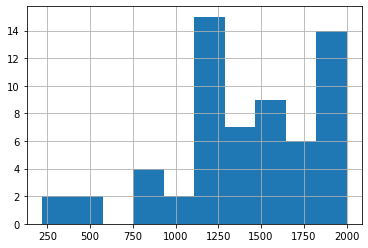

In [19]:
apcs["euro"].hist()

<AxesSubplot:>

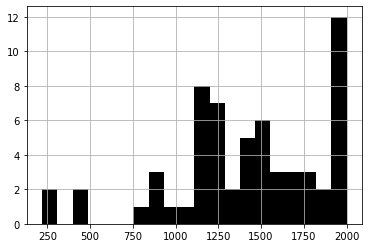

In [20]:
apcs["euro"].hist(bins=20, color="black")

In [21]:
# # Count the number of occurances per publisher
apcs["publisher"].value_counts()

Frontiers Media SA                                  16
Springer Nature                                     13
Public Library of Science (PLoS)                    13
Copernicus GmbH                                      3
Schweizerbart                                        3
Hindawi Publishing Corporation                       3
Scientific Research Publishing, Inc,                 2
American Physical Society (APS)                      1
PAGEPress Publications                               1
IOP Publishing                                       1
Elsevier BV                                          1
Inter-Research Science Center                        1
MDPI AG                                              1
Cogitatio                                            1
The Korean Society of Veterinary Science (KAMJE)     1
Name: publisher, dtype: int64

<AxesSubplot:>

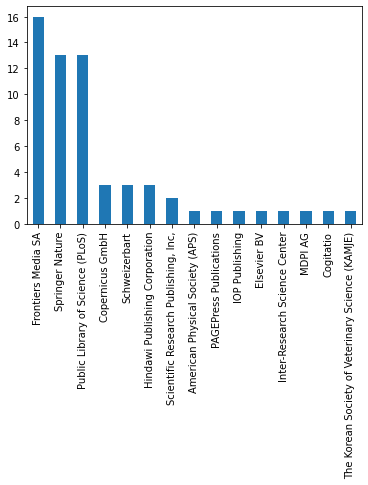

In [22]:
apcs["publisher"].value_counts().plot.bar()

<AxesSubplot:>

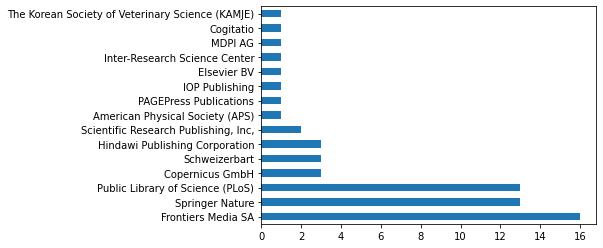

In [23]:
apcs["publisher"].value_counts().plot.barh()

In [24]:
apcs["publisher"].value_counts().plot

In [25]:
# Count the number of occurances per journal
apcs["journal_full_title"].value_counts()

PLOS ONE                                                             10
Frontiers in Psychology                                               9
Meteorologische Zeitschrift                                           3
Scientific Reports                                                    3
Nature Communications                                                 2
PLOS Pathogens                                                        2
Mediators of Inflammation                                             2
Frontiers in Ecology and Evolution                                    2
npj Quantum Information                                               1
Modern Economy                                                        1
Energy and Power Engineering                                          1
Toxins                                                                1
PLOS Computational Biology                                            1
Politics and Governance                                         

## Accumulate with groupby

In [26]:
apcs_publisher_and_spending = apcs[["publisher", "euro"]]

In [27]:
apcs_publisher_and_spending

,publisher,euro
0,Springer Nature,2000.00
1,American Physical Society (APS),1503.12
2,Springer Nature,2000.00
3,Public Library of Science (PLoS),2000.00
4,Springer Nature,1805.00
...,...,...
56,Springer Nature,1731.45
57,Frontiers Media SA,1600.00
58,Frontiers Media SA,219.84
59,Springer Nature,1386.35


In [28]:
# Sum the spendings by publisher
apcs_publisher_and_spending.groupby("publisher").sum()

,euro
publisher,
American Physical Society (APS),1503.12
Cogitatio,430.50
Copernicus GmbH,3272.50
Elsevier BV,1550.33
Frontiers Media SA,21772.15
Hindawi Publishing Corporation,4305.22
IOP Publishing,1392.30
Inter-Research Science Center,1785.00
MDPI AG,1150.00


In [29]:
# Sum the spendings by publisher - now sorted
apcs_publisher_and_spending.groupby("publisher").sum().sort_values(by="euro", ascending=False)

,euro
publisher,
Springer Nature,22118.10
Frontiers Media SA,21772.15
Public Library of Science (PLoS),18688.52
Schweizerbart,5374.00
Hindawi Publishing Corporation,4305.22
Copernicus GmbH,3272.50
Inter-Research Science Center,1785.00
Elsevier BV,1550.33
American Physical Society (APS),1503.12


<AxesSubplot:ylabel='publisher'>

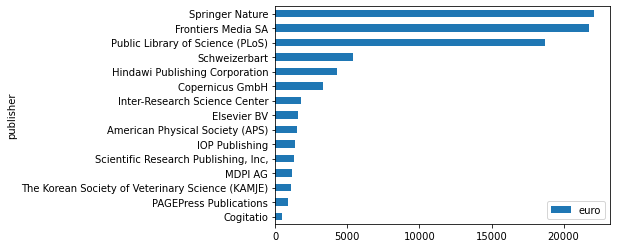

In [30]:
apcs_publisher_and_spending.groupby("publisher").sum().sort_values(by="euro", ascending=True).plot.barh()

In [31]:
# Calculate the average spending by publisher
apcs_publisher_and_spending.groupby("publisher").mean()

,euro
publisher,
American Physical Society (APS),1503.120000
Cogitatio,430.500000
Copernicus GmbH,1090.833333
Elsevier BV,1550.330000
Frontiers Media SA,1360.759375
Hindawi Publishing Corporation,1435.073333
IOP Publishing,1392.300000
Inter-Research Science Center,1785.000000
MDPI AG,1150.000000


## Challenge: Download three different apc data sets and plot a histogram of prices for each of them

### Concepts need to be known to solve the challenge:
- dictionaries
- looping over a dictionary (for loop)
- import the following libraries:
    - pandas as pd
    - urllib.request (module request)
    - matplotlib.pyplot as plt
- urllib.request.urlretrieve
- read in csv files with pandas
- pythons split built in method
- calling an element of a list
- multi-axis indexing with pandas
- concatenating strings with the + operator


In [32]:
# multi-axis indexing with pandas
apcs = pd.read_csv("openapc.csv")
print(apcs.loc[2, "journal_full_title"])
print(apcs.iloc[2, 6])
apcs.head()

Nature Communications
Nature Communications


,institution,period,euro,doi,is_hybrid,publisher,journal_full_title,issn,issn_print,issn_electronic,license_ref,indexed_in_crossref,pmid,pmcid,ut,url,doaj
0,FU Berlin,2015,2000.00,10.1038/npjqi.2015.10,False,Springer Nature,npj Quantum Information,2056-6387,NaN,2056-6387,NaN,True,NaN,NaN,NaN,NaN,True
1,FU Berlin,2015,1503.12,10.1103/PhysRevX.5.041008,False,American Physical Society (APS),Physical Review X,2160-3308,NaN,2160-3308,http://creativecommons.org/licenses/by/3.0/,True,NaN,NaN,NaN,NaN,True
2,FU Berlin,2015,2000.00,10.1038/ncomms9498,False,Springer Nature,Nature Communications,2041-1723,NaN,2041-1723,NaN,True,26577800.0,PMC4673657,NaN,NaN,True
3,FU Berlin,2015,2000.00,10.1371/journal.ppat.1005246,False,Public Library of Science (PLoS),PLOS Pathogens,1553-7374,NaN,1553-7374,http://creativecommons.org/licenses/by/4.0/,True,26544881.0,PMC4636265,NaN,NaN,True
4,FU Berlin,2015,1805.00,10.1186/s13099-015-0075-z,False,Springer Nature,Gut Pathogens,1757-4749,NaN,1757-4749,NaN,True,26483849.0,PMC4610047,NaN,NaN,True


Algorithm (in case learners need some help):

Dictionary  = {source_url_1 : filename_1, source_url_2 : filename_2, source_url_3 : filename_3}

for source_url, filename in Dictionary:

    download source_url to filename
    read in file (csv) with pandas
    make histogram from "euro" column of dataframe
    show or save the plot

### Challenge:
### - Download three different apc data sets and plot a histogram of prices for each of them

### Starting point template:

In [33]:
url_and_filename = {"https://raw.githubusercontent.com/OpenAPC/openapc-de/"
                    "master/data/fuberlin/APC_FU_Berlin_2015.csv" : 
                    "openapc_berlin.csv",
                    
                    "https://raw.githubusercontent.com/OpenAPC/openapc-de/"
                    "master/data/unifrankfurt/open_apc_2018jul-dez_final_enriched.csv" :
                    "openapc_frankfurt.csv",
                    
                    "https://raw.githubusercontent.com/OpenAPC/openapc-de/"
                    "master/data/unimuenster/ULB-Muenster_Open-Access-Fonds_Kosten_2018_enriched.csv" :
                    "openapc_muenster.csv"
                    }
for key, value in url_and_filename.items():
    print(key)
    print(value)

https://raw.githubusercontent.com/OpenAPC/openapc-de/master/data/fuberlin/APC_FU_Berlin_2015.csv
openapc_berlin.csv
https://raw.githubusercontent.com/OpenAPC/openapc-de/master/data/unifrankfurt/open_apc_2018jul-dez_final_enriched.csv
openapc_frankfurt.csv
https://raw.githubusercontent.com/OpenAPC/openapc-de/master/data/unimuenster/ULB-Muenster_Open-Access-Fonds_Kosten_2018_enriched.csv
openapc_muenster.csv


### solution (without saving to file)

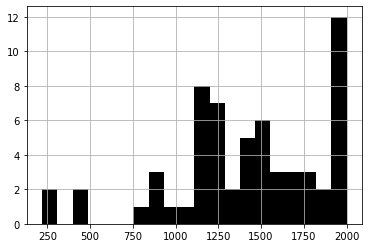

FU Berlin


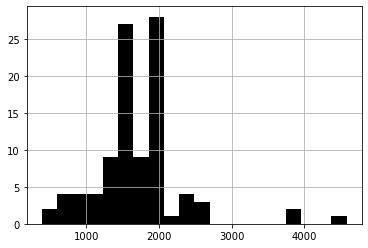

Frankfurt U


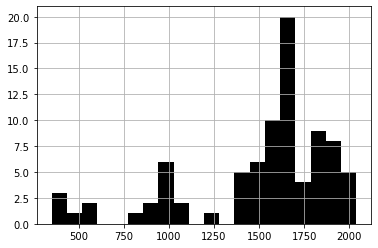

Münster U


In [34]:
%matplotlib inline
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
url_and_filename = {"https://raw.githubusercontent.com/OpenAPC/openapc-de/"
                    "master/data/fuberlin/APC_FU_Berlin_2015.csv" : 
                    "openapc_berlin.csv",
                    
                    "https://raw.githubusercontent.com/OpenAPC/openapc-de/"
                    "master/data/unifrankfurt/open_apc_2018jul-dez_final_enriched.csv" :
                    "openapc_frankfurt.csv",
                    
                    "https://raw.githubusercontent.com/OpenAPC/openapc-de/"
                    "master/data/unimuenster/ULB-Muenster_Open-Access-Fonds_Kosten_2018_enriched.csv" :
                    "openapc_muenster.csv"
                    }

for url, filename in url_and_filename.items():
    urllib.request.urlretrieve(url, filename)
    apcs = pd.read_csv(filename)
    apcs["euro"].hist(bins=20, color="black")
    plt.show()
    print(apcs.loc[1,"institution"])

### Solution including saving the figures to files

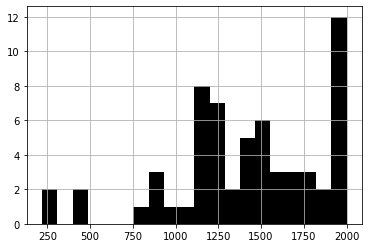

FU Berlin


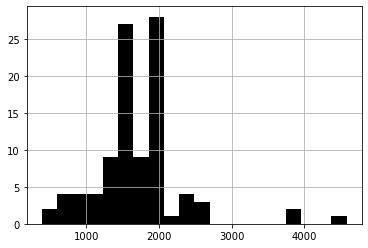

Frankfurt U


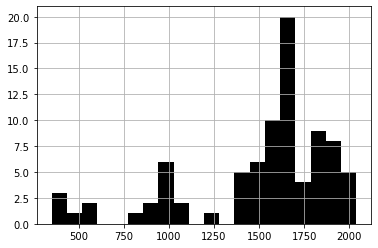

Münster U


In [35]:
%matplotlib inline
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
url_and_filename = {"https://raw.githubusercontent.com/OpenAPC/openapc-de/"
                    "master/data/fuberlin/APC_FU_Berlin_2015.csv" : 
                    "openapc_berlin.csv",
                    
                    "https://raw.githubusercontent.com/OpenAPC/openapc-de/"
                    "master/data/unifrankfurt/open_apc_2018jul-dez_final_enriched.csv" :
                    "openapc_frankfurt.csv",
                    
                    "https://raw.githubusercontent.com/OpenAPC/openapc-de/"
                    "master/data/unimuenster/ULB-Muenster_Open-Access-Fonds_Kosten_2018_enriched.csv" :
                    "openapc_muenster.csv"
                    }

for url, filename in url_and_filename.items():
    urllib.request.urlretrieve(url, filename)
    apcs = pd.read_csv(filename)
    ax = apcs["euro"].hist(bins=20, color="black")
    fig = ax.get_figure()
    fig.savefig(filename.split(".csv")[0] + ".pdf")
    plt.show()
    print(apcs.loc[1,"institution"]) # alternative: apcs.iloc[0,0]

# further filtering and slicing

In [36]:
import pandas as pd
frankfurt_apcs = pd.read_csv("openapc_frankfurt.csv")
#frankfurt_apcs.head()
#frankfurt_apcs.shape
#frankfurt_apcs.columns
frankfurt_apcs["journal_full_title"].unique()
len(frankfurt_apcs["journal_full_title"].unique())
apcs_frankfurt_by_journal = frankfurt_apcs.groupby("journal_full_title")
apcs_frankfurt_by_journal.describe()

period               \
                                                    count    mean  std   
journal_full_title                                                       
Acta Neuropathologica Communications                  1.0  2018.0  NaN   
American Journal of Case Reports                      1.0  2018.0  NaN   
Annals of Clinical and Translational Neurology        1.0  2018.0  NaN   
Atmospheric Chemistry and Physics                     1.0  2018.0  NaN   
Atmospheric Measurement Techniques                    1.0  2018.0  NaN   
BMC Family Practice                                   1.0  2018.0  NaN   
BMC Medical Education                                 1.0  2018.0  NaN   
BMC Oral Health                                       1.0  2018.0  NaN   
BMC Pulmonary Medicine                                1.0  2018.0  NaN   
BMJ Open                                              3.0  2018.0  0.0   
Bioinformatics and Biology Insights                   1.0  2018.0  NaN   
Biology Open                                          1.0  2018.0  NaN   
Biotechnology for Biofuels                            1.0  2018.0  NaN   
Cancers                                               1.0  2018.0  NaN   
Cells                                                 1.0  2018.0  NaN   
Clinical and Translational Gastroenterology           1.0  2018.0  NaN   
EMBO Molecular Medicine                               1.0  2018.0  NaN   
Ecology and Evolution                                 1.0  2018.0  NaN   
FEBS Open Bio                                         2.0  2018.0  0.0   
Frontiers in Bioengineering and Biotechnology         1.0  2018.0  NaN   
Frontiers in Cell and Developmental Biology           1.0  2018.0  NaN   
Frontiers in Computational Neuroscience               1.0  2018.0  NaN   
Frontiers in Endocrinology                            1.0  2018.0  NaN   
Frontiers in Immunology                               8.0  2018.0  0.0   
Frontiers in Microbiology                             4.0  2018.0  0.0   
Frontiers in Neurology                                1.0  2018.0  NaN   
Frontiers in Neurorobotics                            1.0  2018.0  NaN   
Frontiers in Pharmacology                             1.0  2018.0  NaN   
Frontiers in Physiology                               1.0  2018.0  NaN   
Frontiers in Psychology                               7.0  2018.0  0.0   
Geochemical Perspectives Letters                      1.0  2018.0  NaN   
Hepatology Communications                             1.0  2018.0  NaN   
IUCrJ                                                 1.0  2018.0  NaN   
Infection and Drug Resistance                         1.0  2018.0  NaN   
International Journal of Environmental Research...    1.0  2018.0  NaN   
International Journal of Molecular Sciences           6.0  2018.0  0.0   
International Journal of Qualitative Methods          1.0  2018.0  NaN   
Journal of Medical Case Reports                       1.0  2018.0  NaN   
Journal of Vision                                     1.0  2018.0  NaN   
Malaria Journal                                       1.0  2018.0  NaN   
Materials                                             1.0  2018.0  NaN   
Metabolic Engineering Communications                  1.0  2018.0  NaN   
MicrobiologyOpen                                      2.0  2018.0  0.0   
Molecular Autism                                      1.0  2018.0  NaN   
Molecules                                             1.0  2018.0  NaN   
Nature Communications                                 2.0  2018.0  0.0   
New Journal of Physics                                1.0  2018.0  NaN   
PLOS ONE                                             12.0  2018.0  0.0   
PeerJ                                                 1.0  2018.0  NaN   
Scientific Reports                                    5.0  2018.0  0.0   
Stem Cell Reports                                     1.0  2018.0  NaN   
Stem Cell Research                                    1

In [37]:
import pandas as pd
frankfurt_apcs = pd.read_csv("openapc_frankfurt.csv")
#frankfurt_apcs.head()
#frankfurt_apcs.shape
#print(frankfurt_apcs.columns)
frankfurt_apcs["journal_full_title"].unique()

array(['Clinical and Translational Gastroenterology',
       'Scientific Reports', 'Nature Communications', nan,
       'Infection and Drug Resistance', 'PLOS ONE',
       'BMC Pulmonary Medicine', 'Frontiers in Psychology',
       'Frontiers in Neurology', 'Frontiers in Neurorobotics', 'BMJ Open',
       'Journal of Medical Case Reports', 'FEBS Open Bio',
       'BMC Family Practice',
       'Frontiers in Bioengineering and Biotechnology',
       'Frontiers in Cell and Developmental Biology',
       'Frontiers in Microbiology', 'Geochemical Perspectives Letters',
       'Malaria Journal', 'EMBO Molecular Medicine',
       'Acta Neuropathologica Communications',
       'International Journal of Molecular Sciences',
       'International Journal of Qualitative Methods',
       'Stem Cell Reports', 'Biotechnology for Biofuels', 'Cells',
       'Hepatology Communications', 'eLife', 'Frontiers in Immunology',
       'Frontiers in Computational Neuroscience',
       'Frontiers in Pharmacolo

In [38]:
len(frankfurt_apcs["journal_full_title"].unique())

56

In [39]:
# groub rows by value in column "journal_full_title"
apcs_frankfurt_by_journal = frankfurt_apcs.groupby("journal_full_title")
# count shows how many rows belong to the given value(journal title) 
# and gives additional statistics on all columns
#that hold numerical data (doesn't allways make sense: e.g. "period")
apcs_frankfurt_by_journal.describe()

period               \
                                                    count    mean  std   
journal_full_title                                                       
Acta Neuropathologica Communications                  1.0  2018.0  NaN   
American Journal of Case Reports                      1.0  2018.0  NaN   
Annals of Clinical and Translational Neurology        1.0  2018.0  NaN   
Atmospheric Chemistry and Physics                     1.0  2018.0  NaN   
Atmospheric Measurement Techniques                    1.0  2018.0  NaN   
BMC Family Practice                                   1.0  2018.0  NaN   
BMC Medical Education                                 1.0  2018.0  NaN   
BMC Oral Health                                       1.0  2018.0  NaN   
BMC Pulmonary Medicine                                1.0  2018.0  NaN   
BMJ Open                                              3.0  2018.0  0.0   
Bioinformatics and Biology Insights                   1.0  2018.0  NaN   
Biology Open                                          1.0  2018.0  NaN   
Biotechnology for Biofuels                            1.0  2018.0  NaN   
Cancers                                               1.0  2018.0  NaN   
Cells                                                 1.0  2018.0  NaN   
Clinical and Translational Gastroenterology           1.0  2018.0  NaN   
EMBO Molecular Medicine                               1.0  2018.0  NaN   
Ecology and Evolution                                 1.0  2018.0  NaN   
FEBS Open Bio                                         2.0  2018.0  0.0   
Frontiers in Bioengineering and Biotechnology         1.0  2018.0  NaN   
Frontiers in Cell and Developmental Biology           1.0  2018.0  NaN   
Frontiers in Computational Neuroscience               1.0  2018.0  NaN   
Frontiers in Endocrinology                            1.0  2018.0  NaN   
Frontiers in Immunology                               8.0  2018.0  0.0   
Frontiers in Microbiology                             4.0  2018.0  0.0   
Frontiers in Neurology                                1.0  2018.0  NaN   
Frontiers in Neurorobotics                            1.0  2018.0  NaN   
Frontiers in Pharmacology                             1.0  2018.0  NaN   
Frontiers in Physiology                               1.0  2018.0  NaN   
Frontiers in Psychology                               7.0  2018.0  0.0   
Geochemical Perspectives Letters                      1.0  2018.0  NaN   
Hepatology Communications                             1.0  2018.0  NaN   
IUCrJ                                                 1.0  2018.0  NaN   
Infection and Drug Resistance                         1.0  2018.0  NaN   
International Journal of Environmental Research...    1.0  2018.0  NaN   
International Journal of Molecular Sciences           6.0  2018.0  0.0   
International Journal of Qualitative Methods          1.0  2018.0  NaN   
Journal of Medical Case Reports                       1.0  2018.0  NaN   
Journal of Vision                                     1.0  2018.0  NaN   
Malaria Journal                                       1.0  2018.0  NaN   
Materials                                             1.0  2018.0  NaN   
Metabolic Engineering Communications                  1.0  2018.0  NaN   
MicrobiologyOpen                                      2.0  2018.0  0.0   
Molecular Autism                                      1.0  2018.0  NaN   
Molecules                                             1.0  2018.0  NaN   
Nature Communications                                 2.0  2018.0  0.0   
New Journal of Physics                                1.0  2018.0  NaN   
PLOS ONE                                             12.0  2018.0  0.0   
PeerJ                                                 1.0  2018.0  NaN   
Scientific Reports                                    5.0  2018.0  0.0   
Stem Cell Reports                                     1.0  2018.0  NaN   
Stem Cell Research                                    1

In [40]:
# mean publish fee payed for each journal
price_statistics = apcs_frankfurt_by_journal["euro"].describe()
price_statistics

,count,mean,std,min,25%,50%,75%,max
journal_full_title,,,,,,,,
Acta Neuropathologica Communications,1.0,1505.350000,NaN,1505.35,1505.3500,1505.350,1505.3500,1505.35
American Journal of Case Reports,1.0,1046.350000,NaN,1046.35,1046.3500,1046.350,1046.3500,1046.35
Annals of Clinical and Translational Neurology,1.0,2606.050000,NaN,2606.05,2606.0500,2606.050,2606.0500,2606.05
Atmospheric Chemistry and Physics,1.0,1557.710000,NaN,1557.71,1557.7100,1557.710,1557.7100,1557.71
Atmospheric Measurement Techniques,1.0,1992.060000,NaN,1992.06,1992.0600,1992.060,1992.0600,1992.06
BMC Family Practice,1.0,2076.540000,NaN,2076.54,2076.5400,2076.540,2076.5400,2076.54
BMC Medical Education,1.0,1661.240000,NaN,1661.24,1661.2400,1661.240,1661.2400,1661.24
BMC Oral Health,1.0,1622.860000,NaN,1622.86,1622.8600,1622.860,1622.8600,1622.86
BMC Pulmonary Medicine,1.0,1745.000000,NaN,1745.00,1745.0000,1745.000,1745.0000,1745.00


In [41]:
# sort the dataframe by values of a single column
price_statistics.sort_values("mean")
# or just take one column and sort its values
price_statistics["mean"].sort_values()

journal_full_title
International Journal of Qualitative Methods                          391.720000
sub\urban. zeitschrift für kritische stadtforschung                   600.000000
Stem Cell Research                                                    630.970000
PeerJ                                                                 796.160000
Cells                                                                 822.930000
Cancers                                                               830.160000
Frontiers in Cell and Developmental Biology                           895.830000
Frontiers in Bioengineering and Biotechnology                        1000.680000
American Journal of Case Reports                                     1046.350000
Journal of Medical Case Reports                                      1148.350000
Ecology and Evolution                                                1165.010000
Geochemical Perspectives Letters                                     1250.000000
FEBS Open

In [42]:
# filter for mean prices that are above 2000 and less than or equal to 3000
price_statistics["mean"].sort_values()[(price_statistics["mean"] > 2000) & (price_statistics["mean"] <= 3000)]

journal_full_title
Frontiers in Physiology                           2018.83
BMC Family Practice                               2076.54
Clinical and Translational Gastroenterology       2320.50
Infection and Drug Resistance                     2377.62
Stem Cell Reports                                 2380.00
Biotechnology for Biofuels                        2439.50
Annals of Clinical and Translational Neurology    2606.05
eLife                                             2615.98
Hepatology Communications                         2682.26
Name: mean, dtype: float64

In [43]:
# slicing a dataframe
frankfurt_apcs.iloc[:3,1:3]

,period,euro
0,2018.0,2320.5
1,2018.0,1630.3
2,2018.0,4581.5


## Common Questions

- Save histogram:
	- save in variable
	- variable = apcs["euro"].hist(bins=20, color="black")
	- figure = variable.get_figure()
	- figure.safefig("apc_figure.pdf")

- unique()
- value.counts(